## Random Number Generation

The numpy.random module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability istributions. For example, you can get a 4 by 4 array of samples from the standardnormal distribution using normal:


In [1]:
import numpy as np
from numpy import random

In [2]:
samples = random.normal(size= (4,4))

samples

array([[ 1.07113688, -0.11019824, -0.16476462, -0.48516614],
       [ 0.4071041 , -1.22756751, -0.45034078, -0.55089047],
       [ 0.92247841,  0.3778341 , -2.11290256, -0.00297089],
       [-0.64277672,  0.5806195 , -0.00272089, -0.72682038]])

Python’s built-in random module, by contrast, only samples one value at a time. As you can see from this benchmark, numpy.random is well over an order of magnitude faster for generating very large samples:


In [3]:
from random import normalvariate

In [4]:
N = 1000000

In [5]:
%timeit samples = [normalvariate(0,1) for _ in range(N)]

1.65 s ± 475 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit random.normal(size = N)

59.6 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
arr1 = np.array([1,6,33,63,642,13,6,0,3,33,6,77,12,8,23,856,12,0,8,453,3,6,2,11,244,2553])

arr = np.array(arr1, dtype= int)

In [ ]:
random.permutation(arr)

array([2553,  856,  244,   13,    6,    6,    2,   23,  453,   33,   12,
          6,   33,  642,    3,   11,   12,    1,    8,    0,   63,    6,
         77,    3,    0,    8])

In [11]:
random.seed(arr)

In [12]:
arr

array([   1,    6,   33,   63,  642,   13,    6,    0,    3,   33,    6,
         77,   12,    8,   23,  856,   12,    0,    8,  453,    3,    6,
          2,   11,  244, 2553])

In [13]:
random.shuffle(arr)
arr

array([   0,    2,   12,    0,   77,   63,   13,   12,   33,   11,    1,
         23,    8, 2553,  642,    8,    6,    6,    6,    6,  244,  453,
          3,    3,   33,  856])

In [14]:
random.binomial(arr, 12)

ValueError: p < 0, p > 1 or p contains NaNs

In [15]:
arr= random.normal(arr)

C:\Users\mbkmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

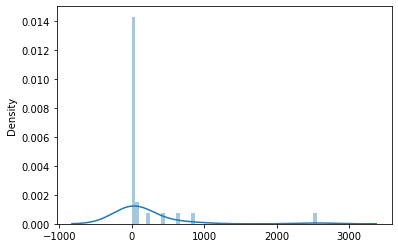

In [16]:
import seaborn as sns

sns.distplot(arr1)

![Partial list of numpy.random function](../../Pictures/Partial%20list%20of%20numpy.random%20functions.png)

## **Example: Random Walks**

An illustrative application of utilizing array operations is in the simulation of random walks. Let’s first consider a simple random walk starting at 0 with steps of 1 and -1 occurring with equal probability. A pure Python way to implement a single random walk with 1,000 steps using the built-in random module:

In [49]:
position = 0
walk = [position]
steps = 100

for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position +=step
    walk.append(position)

In [50]:
nsteps = 100
draws = random.randint(0,2, size = nsteps)
steps = np.where(draws >0, 1, -1)
walk = steps.cumsum()

C:\Users\mbkmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

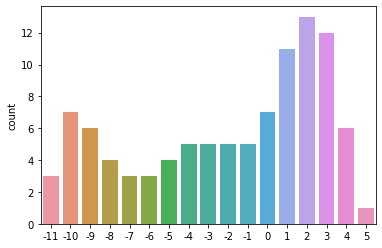

In [58]:
sns.countplot(walk)

<AxesSubplot:ylabel='Proportion'>

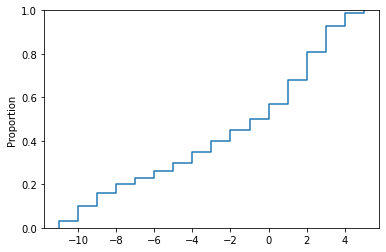

In [62]:
sns.ecdfplot(walk)